Testes de hipóteses --- alguns testes muito utilizados
======================================================



## Importações



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Introdução



Nas aulas anteriores nós investigamos os conceitos fundamentais de testes de hipóteses utilizando estratégias de simulação ou identificando as distribuições esperadas das estatísticas de teste.

Seria bastante subótimo se tivéssemos que montar toda a estrutura que fizemos toda vez que quisermos realizar um teste de hipóteses. Fora isso, ficaria mais difícil de comparar resultados de testes de diferentes pesquisadores e cientistas.

O que existe, então, é um conjunto de testes de hipóteses já prontos, desenvolvidos por diversos estatísticos ao longo dos anos. Existem diversos destes testes de hipóteses que já estão prontos que já e foram amplamente estudados.

O objetivo deste notebook é apresentar sistematicamente (com exemplos) alguns testes de hipóteses bastante utilizados nas ciências naturais. Seria impraticável fazer uma lista extensiva aqui&#x2026; logo, se nenhum destes testes atende um determinado experimento que você realizou, busque mais informações que muito provavelmente existe um teste de hipóteses já pronto que pode te ajudar.

Como sempre, antes de seguir em frente, vamos definir o nível de confiança dos nossos testes.



In [2]:
NIVEL_CONFIANCA = 0.95

significancia = 1 - NIVEL_CONFIANCA

Para nos ajudar a vida, vamos definir uma função que recebe o p-valor e a significância e nos diz qual deve ser a nossa ação.



In [3]:
def printa_resultado(pvalor, significancia):
    if pvalor < significancia:
        print(f"Com esta observação ({pvalor=:.4f}), devemos rejeitar H0")
    else:
        print(f"Com esta observação ({pvalor=:.4f}), não devemos rejeitar H0")

## O teste $t$ para uma amostra



**Objetivo**: quero comparar a média $\mu$ de uma variável aleatória $X$ ($\mu = E[X]$) com um valor $\mu_0$ de minha escolha.

**Hipótese nula**:

-   $H_0$: $\mu = \mu_0$

**Hipóteses alternativas possíveis**:

-   $H_1$: $\mu > \mu_0$

-   $H_1$: $\mu < \mu_0$

-   $H_1$: $\mu \neq \mu_0$

**Suposição relevante**: a variável aleatória $X$ representa uma amostra coletada de uma população que segue uma distribuição normal. Sugestão: ver teste de Shapiro-Wilk abaixo caso queira testar se uma variável aleatória foi coletada de uma população que segue uma distribuição normal.

**Distribuição utilizada para computar a estatística de teste**: $t$ de Student.

**Referências**: Seção 8.3 da Ref. [1] e Ref. [2].

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)



### Exemplo 1



Suponha que fomos ao laboratório e coletamos os seguintes dados.



In [4]:
X = [-1.54, 0.28, 1.83, 4.82, 3.32, 2.66, 4.91, -0.69, -1.47, 0.79, -0.17, 2.16,
      0.84, 2.87, 2.92, 4.34, 1.77, 0.08, 0.97, -0.24]

Vamos levantar as hipóteses do teste. Observe que no exemplo abaixo temos que $\mu_0 = 0,5$.

-   $H_0$: $\mu = 0,5$

-   $H_1$: $\mu \neq 0,5$

Para realizar este teste, executamos o código abaixo.



In [5]:
MI_ZERO = 0.5

resultado_teste = stats.ttest_1samp(X, MI_ZERO)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0311), devemos rejeitar H0


### Exemplo 2: teste após o teste



No teste do exemplo anterior, rejeitamos $H_0$ em favor de $H_1$. A hipótese alternativa nos diz que a média da variável aleatória é diferente de $\mu_0=0,5$ que nós propomos, mas não diz nada além disso.

O que podemos fazer aqui é um *teste após o teste* para saber para qual direção está a média da variável aleatória.

Podemos levantar as seguintes hipóteses:

-   $H_0$: $\mu = 0,5$

-   $H_1$: $\mu > 0,5$

Para realizar este teste, executamos o código abaixo. Preste atenção no argumento `alternative="greater"` (*greater* significa &ldquo;maior que&rdquo; em inglês, observe este fato em conjunto com a $H_1$).



In [6]:
MI_ZERO = 0.5

resultado_teste = stats.ttest_1samp(X, MI_ZERO, alternative="greater")

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0155), devemos rejeitar H0


### Exemplo 3: teste após o teste caso tivéssemos feito outra escolha de $H_1$



O que teria acontecido se tivéssemos escolhido outra hipótese alternativa?

-   $H_0$: $\mu = 0,5$

-   $H_1$: $\mu < 0,5$

Para realizar este teste, executamos o código abaixo. Preste atenção no argumento `alternative="less"` (*less* significa &ldquo;menor que&rdquo; em inglês, observe este fato em conjunto com a $H_1$).



In [7]:
MI_ZERO = 0.5

resultado_teste = stats.ttest_1samp(X, MI_ZERO, alternative="less")

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.9845), não devemos rejeitar H0


## O teste $t$ para duas amostras independentes de mesma variância



**Objetivo**: quero comparar a média $\mu_a$ de uma variável aleatória $X_a$ ($\mu_a = E[X_a]$) com a média $\mu_b$ de uma variável aleatória $X_b$ ($\mu_b = E[X_b]$). $X_a$ e $X_b$ são variáveis aleatórias independentes.

**Hipótese nula**:

-   $H_0$: $\mu_a = \mu_b$

**Hipóteses alternativas possíveis**:

-   $H_1$: $\mu_a > \mu_b$

-   $H_1$: $\mu_a < \mu_b$

-   $H_1$: $\mu_a \neq \mu_b$

**Suposição relevante**: a variância da população de onde $X_a$ foi amostrado é igual à variância da população de onde $X_b$ foi amostrado. Esta condição tem um nome: *homoscedasticidade*.

**Distribuição utilizada para computar a estatística de teste**: $t$ de Student.

**Referência**: [3].

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)



### Exemplo 1



Em um estudo de campo, medimos o tamanho das pétalas de flores da mesma espécie de planta em duas regiões diferentes do cerrado. Registramos estas medidas nas variáveis `Xa` e `Xb`.



In [8]:
Xa = [9.51, 7.8, 9.32, 8.89, 8.41, 8.76, 10.66, 11.38, 9.03, 8.2, 11.08, 10.47,
      11.44, 9.37, 10.33, 8.79, 8.87, 10.58, 9.73, 11.51]

Xb = [11.72, 11.64, 11.67, 11.69, 12.62, 11.18, 10.56, 12.8, 10.41, 11.29,
      12.67, 11.94, 11.78, 12.12, 12.34, 12.42, 11.35, 12.22, 11.25, 11.05]

Vamos levantar as hipóteses do teste.

-   $H_0$: $\mu_a = \mu_b$

-   $H_1$: $\mu_a \neq \mu_b$

Para realizar este teste, executamos o código abaixo.



In [9]:
resultado_teste = stats.ttest_ind(Xa, Xb)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0000), devemos rejeitar H0


### Exemplo 2: teste após o teste



No teste do exemplo anterior, rejeitamos $H_0$ em favor de $H_1$. A hipótese alternativa nos dizia que as médias são diferentes. Vamos realizar nosso teste após o teste para saber qual das médias é maior.

Podemos levantar as seguintes hipóteses:

-   $H_0$: $\mu_a = \mu_b$

-   $H_1$: $\mu_a < \mu_b$

Para realizar este teste, executamos o código abaixo.



In [10]:
resultado_teste = stats.ttest_ind(Xa, Xb, alternative="less")

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0000), devemos rejeitar H0


## O teste $t$ de Welch para duas amostras independentes de variâncias diferentes



**Objetivo**: quero comparar a média $\mu_a$ de uma variável aleatória $X_a$ ($\mu_a = E[X_a]$) com a média $\mu_b$ de uma variável aleatória $X_b$ ($\mu_b = E[X_b]$). $X_a$ e $X_b$ são variáveis aleatórias independentes.

**Hipótese nula**:

-   $H_0$: $\mu_a = \mu_b$

**Hipóteses alternativas possíveis**:

-   $H_1$: $\mu_a > \mu_b$

-   $H_1$: $\mu_a < \mu_b$

-   $H_1$: $\mu_a \neq \mu_b$

**Distribuição utilizada para computar a estatística de teste**: $t$ de Student.

**Comentário**: para fins práticos, é como se fosse o teste $t$ para duas amostras mas sem a restrição de elas terem a mesma variância.

**Referência**: [4].

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)



### Exemplo



Em um estudo de campo, medimos o tamanho das folhas de espécies diferentes de plantas em uma região da mata amazônica. Registramos estas medidas nas variáveis `Xa` e `Xb`.



In [11]:
Xa = [21.07, 18.54, 22.48, 21.93, 22.39, 19.8, 20.16, 18.35, 20.98, 21.67,
      17.55, 17.73, 18.69, 17.97, 19.94, 21.16, 22.39, 19.58, 16.2, 19.46]

Xb = [19.32, 20.08, 20.8, 19.51, 20.81, 17.68, 21.3, 19.81, 19.77, 20.63, 20.75,
      21.68, 19.02, 19.5, 20.63, 18.9, 19.95, 19.07, 18.52, 19.65]

Vamos levantar as hipóteses do teste.

-   $H_0$: $\mu_a = \mu_b$

-   $H_1$: $\mu_a \neq \mu_b$

Para realizar este teste, executamos o código abaixo. Note que devemos passar o atributo `equal_var=False` para que o teste correto seja executado.



In [12]:
resultado_teste = stats.ttest_ind(Xa, Xb, equal_var=False)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.9441), não devemos rejeitar H0


## O teste postos sinalizados de Wilcoxon



**Objetivo**: quero saber se mediana $\tilde{\mu}$ de uma variável aleatória $X$ é igual a zero.

**Hipótese nula**:

-   $H_0$: $\tilde{\mu} = 0$

**Hipóteses alternativas possíveis**:

-   $H_1$: $\tilde{\mu} > 0$

-   $H_1$: $\tilde{\mu} < 0$

-   $H_1$: $\tilde{\mu} \neq 0$

**Distribuição utilizada para computar a estatística de teste**: não tem, este é um teste não-paramétrico.

**Comentário**: é um teste parecido com o teste $t$ para uma amostra, porém não requer que a variável aleatória tenha sido amostrada de uma normal.

**Referência**: Capítulo 15.1 da Ref. [1].

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)



### Exemplo



A variável `diferencas` abaixo registra as diferenças de altura entre plantas de milho com fertilização cruzada e autofecundada:



In [13]:
diferencas = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]

**Comentário**: se você tem os valores em si da altura das plantas (por exemplo) e não a diferença, basta computar a diferença antes de realizar o teste.

Vamos levantar as hipóteses do teste.

-   $H_0$: $\tilde{\mu} = 0$ (isto é, a mediana da distribuição de diferenças é zero, logo não h diferença entre as alturas das plantas)

-   $H_1$: $\tilde{\mu} \neq 0$

Para realizar este teste, executamos o código abaixo.



In [14]:
resultado_teste = stats.wilcoxon(diferencas)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0413), devemos rejeitar H0


Com este resultado, agora queremos realizar um teste após o teste para saber para que lado está a mediana. Vamos levantar as hipóteses do teste.

-   $H_0$: $\tilde{\mu} = 0$

-   $H_1$: $\tilde{\mu} > 0$

Para realizar este teste, executamos o código abaixo.



In [15]:
resultado_teste = stats.wilcoxon(diferencas, alternative="greater")

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0206), devemos rejeitar H0


## Análise de variância de um fator (ANOVA)



**Objetivo**: quero comparar as médias $\mu_1$, $\mu_2$, &#x2026;, $\mu_k$ de três ou mais variáveis aleatórias $X_1$, $X_2$, &#x2026;, $X_k$.

**Hipótese nula**:

-   $H_0$: $\mu_1 = \mu_2 = \cdots = \mu_k$

**Hipótese alternativa**:

-   $H_1$: pelo menos uma das médias $\mu_i$ é diferente das demais

**Suposições relevantes**:

-   As variáveis aleatórias $X_1$, $X_2$, &#x2026;, $X_k$ são independentes

-   As variáveis aleatórias $X_1$, $X_2$, &#x2026;, $X_k$ seguem distribuições normais (segundo a Ref. [5], podemos utilizar este teste mesmo que esta condição *não* seja verdadeira, principalmente em conjuntos de dados grandes)

-   As variâncias das populações de onde as variáveis aleatórias $X_1$, $X_2$, &#x2026;, $X_k$ foram amostradas são iguais. Esta condição tem um nome: *homoscedasticidade*.

**Distribuição utilizada para computar a estatística de teste**: distribuição $F$ de Fisher-Senecor [6].

**Referência**: O capítulo 9.4 da Ref. [5] abre as contas deste teste de hipóteses. Ver também o capítulo 10 da Ref. [1].

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)



### Exemplo 1



Abaixo temos alguns dados sobre a medida de concha (o comprimento da cicatriz do músculo adutor anterior, padronizado pela divisão pelo comprimento) no mexilhão *Mytilus trossulus* de cinco locais diferentes: Tillamook, Oregon; Newport, Oregon; Petersburg, Alasca; Magadan, Rússia; e Tvarminne, Finlândia, retirados de um conjunto de dados muito maior reportado na Ref. [12] (dados obtidos na [página](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) da análise ANOVA do `scipy`).



In [16]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]

newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]

petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]

magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

Vamos levantar as hipóteses do teste.

-   $H_0$: as médias da medida de concha dos mexilhões são iguais

-   $H_1$: pelo menos uma das médias é diferente das outras

Para realizar este teste, executamos o código abaixo.



In [17]:
resultado_teste = stats.f_oneway(
    tillamook, newport, petersburg, magadan, tvarminne
)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0003), devemos rejeitar H0


### Exemplo 2 - análise post-hoc



Com o teste realizado no exemplo anterior, nós rejeitamos $H_0$.

E agora? Como descobrir qual(is) das espécies de mexilhões tem média(s) diferente(s)? Pode ser tentador identificar todos os pares possíveis de mexilhões e utilizar um teste $t$ para cada par e checar se as médias são iguais. No entanto, <u>esta estratégia nos leva a um enorme número de falsos positivos</u> (erros tipo I)!!! Esta é uma &ldquo;receita perfeita&rdquo; para p-hacking&#x2026;

Uma estratégia para para seguir em frente é realizar uma *análise post-hoc*. Uma análise possível é o *teste da diferença significativa honesta de Tukey*. Os detalhes deste teste estão discutidos em outras fontes [13].

Antes de seguir em frente com o teste, vamos observar graficamente o que temos.



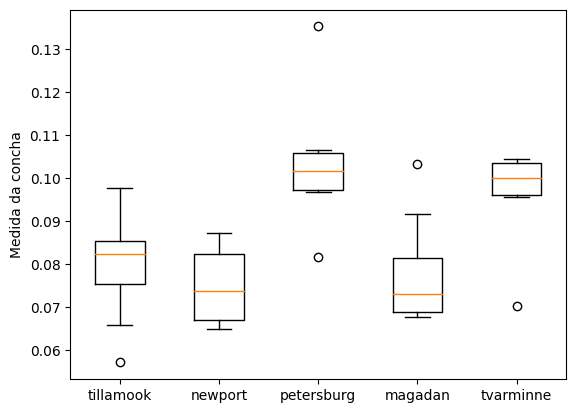

In [18]:
figura, eixo = plt.subplots()

eixo.boxplot([tillamook, newport, petersburg, magadan, tvarminne])

eixo.set_xticklabels(
    ["tillamook", "newport", "petersburg", "magadan", "tvarminne"]
)
eixo.set_ylabel("Medida da concha");

Para realizar este teste, executamos o código abaixo. Note que a hipótese nula para cada p-valor abaixo diz que as médias entre os pares são iguais e a hipótese alternativa diz que as médias entre os pares são diferentes.



In [19]:
resultado_teste = stats.tukey_hsd(
    tillamook, newport, petersburg, magadan, tvarminne
)

print(resultado_teste)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.005     0.893    -0.012     0.023
 (0 - 2)     -0.023     0.006    -0.041    -0.005
 (0 - 3)      0.002     0.996    -0.015     0.019
 (0 - 4)     -0.016     0.145    -0.034     0.003
 (1 - 0)     -0.005     0.893    -0.023     0.012
 (1 - 2)     -0.029     0.001    -0.047    -0.010
 (1 - 3)     -0.003     0.986    -0.021     0.015
 (1 - 4)     -0.021     0.032    -0.040    -0.001
 (2 - 0)      0.023     0.006     0.005     0.041
 (2 - 1)      0.029     0.001     0.010     0.047
 (2 - 3)      0.025     0.004     0.007     0.044
 (2 - 4)      0.008     0.803    -0.012     0.028
 (3 - 0)     -0.002     0.996    -0.019     0.015
 (3 - 1)      0.003     0.986    -0.015     0.021
 (3 - 2)     -0.025     0.004    -0.044    -0.007
 (3 - 4)     -0.018     0.093    -0.037     0.002
 (4 - 0)      0.016     0.145    -0.003     0.034
 (4 - 1)      0.021     0.032   

## O teste de normalidade de Shapiro-Wilk



**Objetivo**: quero saber se uma variável aleatória $X$ foi amostrada de uma distribuição normal.

**Hipótese nula**:

-   $H_0$: a população de onde $X$ foi amostrado segue uma distribuição normal

**Hipótese alternativa**:

-   $H_1$: a população de onde $X$ foi amostrado *não* segue uma distribuição normal

**Distribuição utilizada para computar a estatística de teste**: ver na Ref. [10]. É uma equação difícil de ser calculada analiticamente e em geral utilizamos de simulação para executar este teste (conhecida como estratégia de Monte Carlo, foi o que fizemos nos notebooks anteriores).

**Referência**: [10].

**Implementação no `scipy`**:
[https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)



### Exemplo



Abaixo temos algumas alturas reportadas pelos alunos da Ilum da turma 2023 no início do segundo semestre de 2023.



In [20]:
alturas = [174, 173, 182, 169, 162, 161, 188, 152, 160, 180, 153, 155, 170, 170,
           191, 169, 176, 175, 170, 161, 184, 175, 176, 169, 170, 170, 171, 175]

Vamos levantar as hipóteses do teste.

-   $H_0$: a população de onde as alturas foram amostrados segue uma distribuição normal

-   $H_1$: a população de onde as alturas foram amostradas *não* segue uma distribuição normal

Para realizar este teste, executamos o código abaixo.



In [21]:
resultado_teste = stats.shapiro(alturas)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.4474), não devemos rejeitar H0


## O teste de aderência qui-quadrado (goodness of fit)



**Objetivo**: quero comparar a frequência observada de dados categóricos com uma frequência esperada.

**Hipótese nula**:

-   $H_0$: a frequência observada é igual a frequência esperada.

**Hipótese alternativa**:

-   $H_1$: a frequência observada *não* é igual a frequência esperada.

**Condições para uso**: este teste não funciona bem se as frequências forem muito baixas. Como regra geral, garanta que todas as frequências são maiores ou iguais a 5. É importante que se tenha 13 ou mais observações/amostras para utilizar este teste.

**Distribuição utilizada para computar a estatística de teste**: qui-quadrado.

**Referência**: O capítulo 8.5 da Ref. [5] e Ref. [9]. Vale muito a pena assistir aos vídeos das Refs. [15] e [16].

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)

**Comentário**: também conhecido como *chi-squared goodness of fit test* em inglês.



### Exemplo 1



Digamos que você tenha um modelo para a frequência de cor de cabelo. Digamos que você acredite que 1/3 das pessoas têm cabelo preto, 1/3 têm cabelo loiro e 1/3 têm cabelo ruivo (um modelo bastante simples, mas ainda um modelo).



In [22]:
distribuicao_modelo = np.array([1/3, 1/3, 1/3])

Em uma sala com 50 pessoas, você observou 30 pessoas com cabelo preto, 15 pessoas com cabelo loiro e apenas 5 pessoas com cabelo ruivo.



In [23]:
freq_observada = np.array([30, 15, 5])

Você quer testar se sua frequência observada condiz com o modelo que você tem.

Vamos levantar as hipóteses do teste.

-   $H_0$: a frequência observada é igual a frequência esperada pelo modelo

-   $H_1$: a frequência observada *não* é igual a frequência esperada modelo

Antes de realizar o teste, devemos calcular a frequência esperada baseada no modelo. Observe que <u>a soma da frequência esperada deve ser igual à soma da frequência observada</u>.



In [24]:
freq_esperada = distribuicao_modelo / sum(distribuicao_modelo) * sum(freq_observada)

print(freq_esperada)

[16.66666667 16.66666667 16.66666667]


Para realizar este teste, executamos o código abaixo.



In [25]:
resultado_teste = stats.chisquare(freq_observada, freq_esperada)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0001), devemos rejeitar H0


Como pode ver, rejeitamos a hipótese de que a frequência observada é igual à frequência do modelo. Precisamos rever o modelo!



### Exemplo 2



Existe um jogo tipo mundo aberto chamado Artesãos de Minas. Neste jogo, você controla um aventureiro em um mundo feito de blocos e uma das suas tarefa é coletar recursos contidos nos blocos deste mundo.

Ao investigar uma certa região neste jogo, você coletou os seguintes recursos: 112 blocos de queijo, 72 blocos de doce de leite, 29 blocos de tutu de feijão e apenas 12 blocos de torresmo pururuca.



In [26]:
freq_observada = np.array([112, 72, 29, 12])

Segundo a wiki do jogo, a distribuição esperada destes recursos na região é 50% de blocos de queijo, 30% de blocos de doce de leite, 15% de blocos de tutu de feijão e 5% de blocos de torresmo pururuca.



In [27]:
distribuicao_wiki = np.array([50, 30, 15, 5])

Você quer testar se sua frequência observada condiz com o que está escrito na wiki.

Vamos levantar as hipóteses do teste.

-   $H_0$: a frequência observada é igual a frequência esperada (reportada na wiki)

-   $H_1$: a frequência observada *não* é igual a frequência esperada (reportada na wiki)

Antes de realizar o teste, devemos calcular a frequência esperada baseada na informação da wiki. Observe que <u>a soma da frequência esperada deve ser igual à soma da frequência observada</u>.



In [28]:
freq_esperada = distribuicao_wiki / sum(distribuicao_wiki) * sum(freq_observada)

print(freq_esperada)

[112.5   67.5   33.75  11.25]


Para realizar este teste, executamos o código abaixo.



In [29]:
resultado_teste = stats.chisquare(freq_observada, freq_esperada)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.7962), não devemos rejeitar H0


## O teste de independência qui-quadrado



**Objetivo**: quero saber se duas ou mais variáveis aleatórias ($X_1$, $X_2$, &#x2026;, $X_k$) são independentes.

**Hipótese nula**:

-   $H_0$: as variáveis aleatórias ($X_1$, $X_2$, &#x2026;, $X_k$) são independentes.

**Hipótese alternativa**:

-   $H_1$: existem pelo menos duas variáveis aleatória $X_i$ e $X_n$ que são dependentes.

**Condições para uso**: para este teste é necessário o uso de uma tabela de contingência [7]. Nesta tabela, todas as frequências devem ser maiores ou iguais a 5.

**Distribuição utilizada para computar a estatística de teste**: qui-quadrado.

**Referência**: O capítulo 8.5 da Ref. [5] (ver exercício 8.11) e Ref. [8]. Veja o vídeo da Ref. [15] caso tenha dúvidas entre os testes chi-quadrado apresentados neste notebook.

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)



### Exemplo 1



Para utilizarmos este teste, é necessário termos uma tabela de contingência. Segundo a Wikipédia &ldquo;As tabelas de contingência são usadas para registrar observações independentes de duas ou mais variáveis aleatórias, normalmente qualitativas&rdquo;. [7]

Abaixo temos a tabela de contingência sobre dados de duas variáveis aleatórias &ldquo;toma aspirina&rdquo; e &ldquo;teve AVC isquêmico&rdquo; da Ref. [14].



In [30]:
dados = {
    "Evento": ["AVC isquêmico", "Sem AVC"],
    "Aspirina": [176, 21035],
    "Placebo/Controle": [230, 21018],
}

tabela_contingencia = pd.DataFrame(dados)
tabela_contingencia = tabela_contingencia.set_index("Evento", drop=True)

tabela_contingencia

,Aspirina,Placebo/Controle
Evento,,
AVC isquêmico,176,230
Sem AVC,21035,21018


Será que as variáveis aleatórias &ldquo;toma aspirina&rdquo; e &ldquo;teve AVC isquêmico&rdquo; são independentes? Vamos testar!

Vamos levantar as hipóteses do teste.

-   $H_0$: as variáveis aleatórias &ldquo;toma aspirina&rdquo; e &ldquo;teve AVC isquêmico&rdquo; são independentes.

-   $H_1$: as variáveis aleatórias &ldquo;toma aspirina&rdquo; e &ldquo;teve AVC isquêmico&rdquo; *não* são independentes.

Para realizar este teste, executamos o código abaixo.



In [31]:
resultado_teste = stats.chi2_contingency(tabela_contingencia)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0087), devemos rejeitar H0


### Exemplo 2



Abaixo temos a tabela de contingência sobre dados de duas variáveis aleatórias &ldquo;gosta de abacaxi na pizza?&rdquo; e &ldquo;casa preferida de Harry Potter&rdquo; apresentada no vídeo da Ref. [15].



In [32]:
dados = {
    "Abacaxi na pizza?": ["Gosto", "Não gosto"],
    "Grifinória": [82, 79],
    "Lufa-lufa": [130, 122],
    "Sonserina": [240, 204],
    "Corvinal": [69, 74],
}

tabela_contingencia = pd.DataFrame(dados)
tabela_contingencia = tabela_contingencia.set_index("Abacaxi na pizza?", drop=True)

tabela_contingencia

,Grifinória,Lufa-lufa,Sonserina,Corvinal
Abacaxi na pizza?,,,,
Gosto,82,130,240,69
Não gosto,79,122,204,74


Será que as variáveis aleatórias &ldquo;gosta de abacaxi na pizza?&rdquo; e &ldquo;casa preferida de Harry Potter&rdquo; são independentes? Vamos testar!

Vamos levantar as hipóteses do teste.

-   $H_0$: as variáveis aleatórias &ldquo;gosta de abacaxi na pizza?&rdquo; e &ldquo;casa preferida de Harry Potter&rdquo; são independentes.

-   $H_1$: as variáveis aleatórias &ldquo;gosta de abacaxi na pizza?&rdquo; e &ldquo;casa preferida de Harry Potter&rdquo; *não* são independentes.

Para realizar este teste, executamos o código abaixo.



In [33]:
resultado_teste = stats.chi2_contingency(tabela_contingencia)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.6498), não devemos rejeitar H0


## Teste $U$ de Mann-Whitney (ou teste da soma dos postos de Wilcoxon)



**Objetivo**: quero saber se duas variáveis aleatórias $X_a$ e $X_b$ foram amostradas de uma mesma distribuição.

**Hipótese nula**:

-   $H_0$: as distribuições de onde $X_a$ e $X_b$ forma amostradas são iguais

**Hipóteses alternativas possíveis**:

-   $H_1$: a distribuição de onde $X_a$ foi amostrada é estocasticamente *maior* do que a distribuição de onde $X_b$ foi amostrada (de maneira simples, isso quer dizer que a distribuição de $X_a$ está *em geral* deslocada para a direita em relação à $X_b$)

-   $H_1$: a distribuição de onde $X_a$ foi amostrada é estocasticamente *menor* do que a distribuição de onde $X_b$ foi amostrada (de maneira simples, isso quer dizer que a distribuição de $X_a$ está *em geral* deslocada para a esquerda em relação à $X_b$)

-   $H_1$: uma das distribuições de onde amostramos as variáveis aleatórias é estocasticamente maior que a outra (de maneira simples, isso quer dizer que uma das distribuições está deslocada para a direita com relação a outra)

**Distribuição utilizada para computar a estatística de teste**: não tem, este é um teste não-paramétrico.

**Referência**: Capítulo 15.2 da Ref. [1].

**Implementação no `scipy`**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)



### Exemplo



Vamos simular a coleta de duas variáveis aleatórias $X_a$ e $X_b$. Nós sabemos que elas vem de distribuições uniformes diferentes (pois está no código). Observe que elas têm tamanhos diferentes



In [34]:
Xa = stats.uniform(-1, 1).rvs(10)
Xb = stats.uniform(-0.5, 1.5).rvs(15)

print(Xa)
print()
print(Xb)

[-0.14067549 -0.75255865 -0.84048191 -0.6937579  -0.84735413 -0.54395399
 -0.65933075 -0.67185794 -0.38830296 -0.53756264]

[ 0.91567646 -0.14909905 -0.02527587 -0.18669053  0.04487855  0.02942462
  0.53258577  0.57842804  0.53990269  0.24642184  0.98222014  0.61714356
  0.69048221  0.33023545 -0.19960262]


Vamos levantar as hipóteses do teste.

-   $H_0$: as distribuições de onde $X_a$ e $X_b$ forma amostradas são iguais

-   $H_1$: uma das distribuições de onde amostramos as variáveis aleatórias é estocasticamente maior que a outra (de maneira simples, isso quer dizer que uma das distribuições está deslocada para a direita com relação a outra)

Para realizar este teste, executamos o código abaixo.



In [35]:
resultado_teste = stats.ranksums(Xa, Xb)

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=0.0001), devemos rejeitar H0


Com este resultado, agora queremos realizar um teste após o teste para saber para que lado está a mediana. Vamos levantar as hipóteses do teste.

-   $H_0$: as distribuições de onde $X_a$ e $X_b$ forma amostradas são iguais

-   $H_1$: a distribuição de onde $X_a$ foi amostrada é estocasticamente *maior* do que a distribuição de onde $X_b$ foi amostrada (de maneira simples, isso quer dizer que a distribuição de $X_a$ está *em geral* deslocada para a direita em relação à $X_b$)

Para realizar este teste, executamos o código abaixo.



In [36]:
resultado_teste = stats.ranksums(Xa, Xb, alternative="greater")

pvalor = resultado_teste.pvalue

printa_resultado(pvalor, significancia)

Com esta observação (pvalor=1.0000), não devemos rejeitar H0


## Testes de hipóteses para aprofundar seus conhecimentos



**Teste de Kruskal-Wallis**: Teste tipo ANOVA não-paramétrico. Requer apenas que as variáveis aleatórias sejam independentes. Ver capítulo 15.4 da Ref. [1] e função do `scipy` [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html).

**Teste da variância de Levene**: Teste para checar se duas ou mais variáveis aleatórias têm a mesma variância. Muito útil antes de utilizar ANOVA. Ver a [página na Wikipédia](https://en.wikipedia.org/wiki/Levene%27s_test) e a [função](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) do `scipy`.



## XKCD relevante



![img](https://imgs.xkcd.com/comics/p_values.png)

`Imagem: P-Values (XKCD) disponível em https://xkcd.com/1478`



## Referências



1.  DEVORE, Jay L. Probabilidade E Estatística Para Engenharia E Ciências. Tradução Da 9ª Edição Norte-Americana. Cengage Learning, 2018.

2.  Teste $t$ de Student [https://en.wikipedia.org/wiki/Student%27s_t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)

3.  Teste $t$ de Student para duas variáveis independentes [https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)

4.  Teste $t$ de Welch [https://en.wikipedia.org/wiki/Welch%27s_t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test)

5.  MAGALHÃES, Marcos N.; LIMA, Antonio Carlos Pedroso de. Noções de probabilidade e estatística. 7a. ed. São Paulo: EDUSP, 2011.

6.  Distribuição $F$ de Fisher-Senecor [https://en.wikipedia.org/wiki/F-distribution](https://en.wikipedia.org/wiki/F-distribution)

7.  Tabela de contingência [https://en.wikipedia.org/wiki/Contingency_table](https://en.wikipedia.org/wiki/Contingency_table)

8.  Teste de independência chi-quadrado [https://en.wikipedia.org/wiki/Chi-squared_test](https://en.wikipedia.org/wiki/Chi-squared_test)

9.  Teste de aderência chi-quadrado [https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)

10. Teste de Shapiro-Wilk [https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

11. Análise de variância (Wikipédia) [https://en.wikipedia.org/wiki/One-way_analysis_of_variance](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)

12. Handbook of Biological Statistics [https://www.biostathandbook.com/onewayanova.html](https://www.biostathandbook.com/onewayanova.html)

13. Referências sobre o teste de Tukey
    -   [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html)
    
    -   [https://www.biostathandbook.com/onewayanova.html](https://www.biostathandbook.com/onewayanova.html)
    
    -   [https://en.wikipedia.org/wiki/Tukey%27s_range_test](https://en.wikipedia.org/wiki/Tukey%27s_range_test)

14. Berger, Jeffrey S. et al. “Aspirin for the Primary Prevention of Cardiovascular Events in Women and Men: A Sex-Specific Meta-analysis of Randomized Controlled Trials.” JAMA, 295(3):306-313, DOI:10.1001/jama.295.3.306, 2006.

15. Teste chi-quadrado do Crash Course [https://www.youtube.com/watch?v=7_cs1YlZoug](https://www.youtube.com/watch?v=7_cs1YlZoug)

16. Teste de aderência do chi-quadrado do Zed Statistics [https://www.youtube.com/watch?v=ZNXso_riZag](https://www.youtube.com/watch?v=ZNXso_riZag)

